# Supervised Learning

With given data set $D = {x^(i),y^(i):i = 1,2...,n}$ of traning examples we want to find a function <center>$h:X \rightarrow Y, x^{(i)} \in X, y^{(i)} \in Y$</center> 
such $h(x)$ predicts (approximates) $y$ as good as possible. $h$ is our hypothesis.
<br>
We will discause two case scenerios: when data is continous or discrete.

## 1. Linear Regression
When the outcome is continous, in example $y \in \mathbb{R}$ then we use the deal linear regression problem. (when $y$ are discrete, then it's a classification problem)
<br>
For Linear Regression the $h$ is given as
<center>$h_{\theta}(x) = \sum_{i=0}^{d}\theta_i x_i = \theta^T \cdot x \approx y$</center>
where $x = (x_0, x_1, ... , x_d), x_0 = 1, \theta = (\theta_0, \theta_1, ..., \theta_d)$. <br>
We are going to define here a cost function $J$, where
<center>$J(\theta) = \frac{1}{2} \sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})^2$</center>

#### Exmaple
Let's  look at an example.

In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df["target"] = pd.Categorical(iris.target_names[iris.target])

In [2]:
for key in iris:
    print(key)

iris["feature_names"]

data
target
frame
target_names
DESCR
feature_names
filename
data_module


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris_df.loc[[0,1,50,51,100,101]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


In [4]:
iris_df.shape

(150, 5)

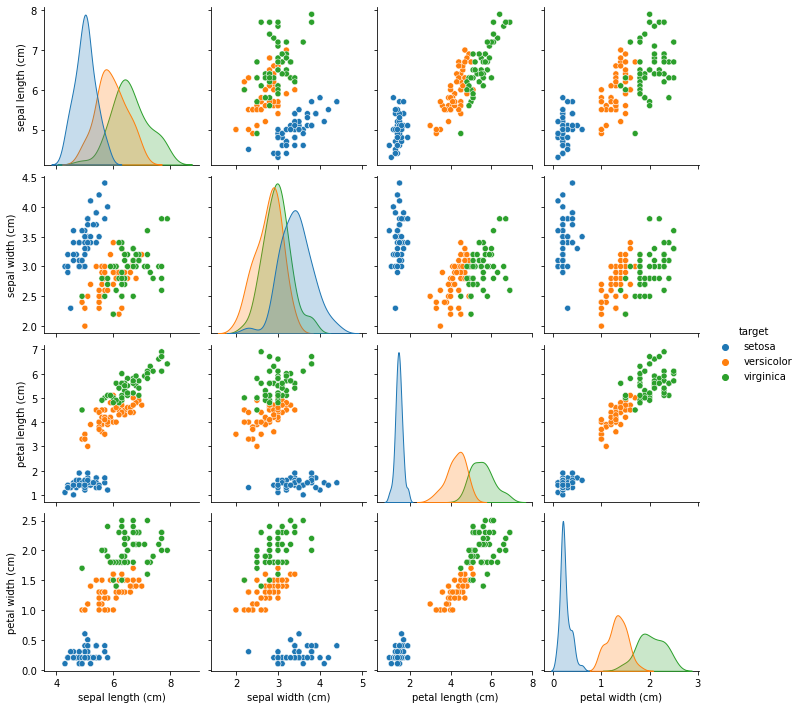

In [5]:
sns.pairplot(iris_df,hue="target")

We can see on plots corrrelation between petal length and petal width. Let's try to do predictions of petal length based on petal width. <br>
Let $D = \{(x^{(i)},y^{(i)}):i = 0,1,2,...,150\}$, where $x$ - (1,petal width), $y$ - petal length.

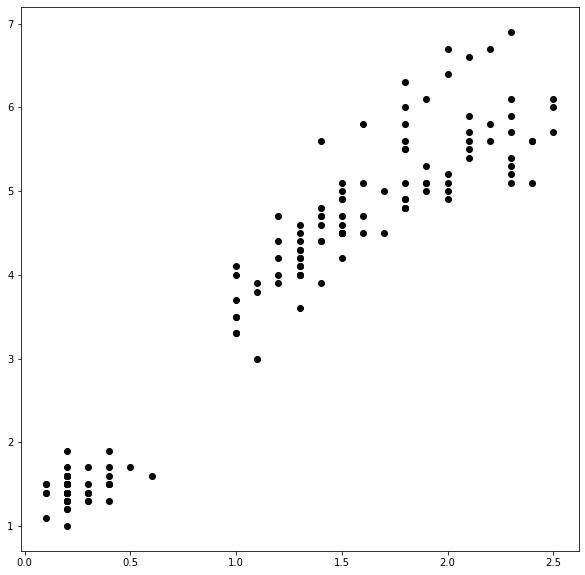

In [6]:
x = np.array(iris_df["petal width (cm)"])
y = np.array(iris_df["petal length (cm)"])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x,y,color='k')

How do we find such a $\theta$ that our $h$-hypothesis will work best?

###  Gradient Descent Algorithm introdution
$\theta \leftarrow$ initialize<br>
for j=0,1,...,d:<br>
$\theta_j \leftarrow \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $ <br>
where $\theta = (\theta_0, \theta_1, ..., \theta_d)$, $\alpha$-learning rate

<br>
If we apply our hypothesis $h_\theta (x) = \theta_0 x_0 + \sum_{i=1}^{d} \theta_i x_i$, where $x_0 = 1$. And if we calculate above expresion than the algorithm is <br>
$\theta \leftarrow$ initialize<br>
do until convarge:<br>
$\theta \leftarrow \theta + \alpha \sum_{i=1}^{n} (y^{(i)} - \theta^T x^{(i)})x^{(i)} $ <br>

#### Example | GDA
Let's look at the simple example of how gradient descent behave on a simple function $f(x) = x^2 + 1$. <br>
Motivation: we will lately consider a cost fuction $J(\theta)$ mantioned at the begining, and we will try to minimize it with described here methods.

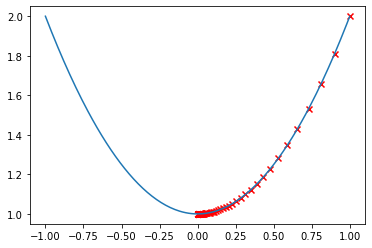

In [7]:
# we declare a quadratic function
f2 = lambda x:x**2+1
x = np.linspace(-1,1,201)
y = f2(x)
# we find its derivative/(one dimesnional gradient)
f2_prim = lambda x:2*x
# we applay a gds
def grad_des(x0,grad_fn,alpha,iter_grad):
    x = x0
    x_list = [x]
    for i in range(iter_grad):
        x -= alpha*grad_fn(x)
        x_list.append(x)
        
    return x_list

x0_list = np.array(grad_des(1,f2_prim,0.05,100))
y0_list = f2(x0_list)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(x0_list,y0_list,marker='x',c='r')
#[round(x,5) for x in x0_list ]

As we can see, $x$ is moving towards a minium of the function. Generaly this kind of behavior also appears in more dimensional fuctions e.g. with more points of freedom. This is also important to notice how $\alpha$ is important. If we for example typed in our example $\alpha = 1$, than:

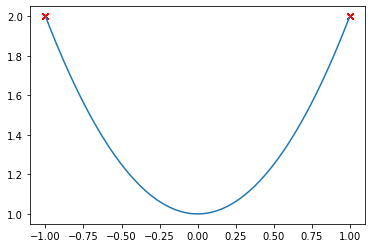

In [8]:
x0_list = np.array(grad_des(1,f2_prim,1,10))
y0_list = f2(x0_list)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(x0_list,y0_list,marker='x',c='r')

We will never find a minimum...

#### Example Approximating $f(x) \approx h(x)$
Where $f(x) = x^2 + 1$ and $h(x) = ax + b$, where $x \in [0,1]$ and $a,b$ we'd like to find.
Then our problem we'd like to break down like this, let's define a new function <br>
<center>$J(a,b;x) = (f(x) - h(x))^2 = (f(x) - (ax + b))^2$</center> 
Minimizing this expression means that we will find parameters $a,b$ that fit most. So we want to do it as above, but this time in respect to $a$ and $b$. Hence <br>
$\frac{\partial J}{\partial a} = -2x (f(x) - (ax + b))$ <br>
$\frac{\partial J}{\partial b} = -2 (f(x) - (ax + b))$ <br>
Then we would like to update: <br>
$a_{k+1} \leftarrow a_{k} - \alpha \frac{\partial J}{\partial a}(x_k)$ <br>
$b_{k+1} \leftarrow b_{k} - \alpha \frac{\partial J}{\partial b}(x_k)$ <br>


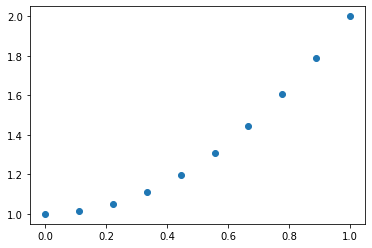

In [9]:
# we define our function
x = np.linspace(0,1,10)
y = f2(x)
# lets plot our data
plt.scatter(x,y)

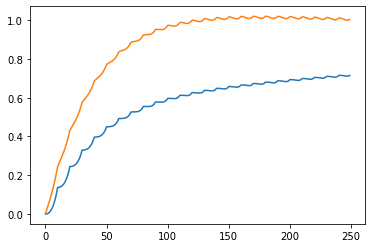

In [10]:
# we apply the above algorithm
def grad_des2(start_2d,x,y,alpha,grad_iter):
    N = len(x)
    a, b = start_2d
    grad_a = lambda x:-2*x*(f2(x)-a*x-b)
    grad_b = lambda x:-2*(f2(x)-a*x-b)
    a_list, b_list = [a], [b]
    for t in range(grad_iter):
        for i in range(N):
            a -= alpha*grad_a(x[i])
            b -= alpha*grad_b(x[i])
            a_list.append(a)
            b_list.append(b)
            
    return a_list, b_list

a_list, b_list = grad_des2([0,0],x,y,0.01,1000)
plt.plot(a_list[:250])
plt.plot(b_list[:250])

We observe that out a's and b's parameters are converging. But there is a significant change after a 1000 of updates. (1) - we will come back to this.

1.0117325782606414 0.8469552600522564


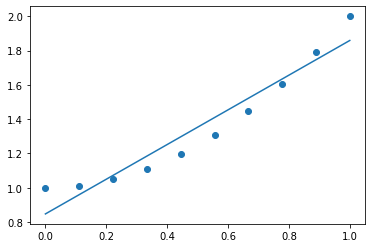

In [11]:
def lin_func_plot(a, b, start, stop,ax=None):
    x = np.linspace(start,stop,10)
    y = a*x + b
    if ax == None:
        plt.plot(x,y)
        return x,y
    ax.plot(x,y)
    return x, y

plt.scatter(x,y)
vx, vy = lin_func_plot(a_list[-1],b_list[-1],0,1)
print(a_list[-1],b_list[-1])


We found a nice approximation of out $f$ - function. We can say that $h(x) \approx y = f(x)$, where $h(x) = ax +b$. <br>
With respect to our intruduction at the beginnig, we can say that we found a $\theta = (\theta_0, \theta_1)$ ($=(b,a)$) for our hypothesis function $h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x$. 

#### Example Batch Gradient Descent
Let us make another approach. Instead of updateing out parameters by single data points we will update them all in single step, e.g. <br>
$a_{k+1} \leftarrow a_{k} - \alpha \sum_{i=1}^N \frac{\partial J}{\partial a}(x_i)$ <br>
$b_{k+1} \leftarrow b_{k} - \alpha \sum_{i=1}^N \frac{\partial J}{\partial b}(x_i)$ <br>


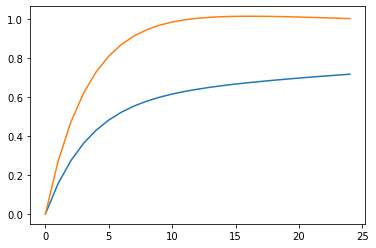

In [12]:
# we apply the algorithm
def grad_des2(start_2d,x,y,alpha,grad_iter):
    N = len(x)
    a, b = start_2d
    grad_a = lambda x:-2*x*(f2(x)-a*x-b)
    grad_b = lambda x:-2*(f2(x)-a*x-b)
    a_list, b_list = [a], [b]
    for t in range(grad_iter):
        s_a, s_b = 0, 0
        for i in range(N):
            s_a += grad_a(x[i])
            s_b += grad_b(x[i])
        # our learning aplha rate is alpha*(1/N)
        a -= alpha*s_a/N
        b -= alpha*s_b/N
        a_list.append(a)
        b_list.append(b)
            
    return a_list, b_list

a1_list, b1_list = grad_des2([0,0],x,y,0.1,1000)
plt.plot(a1_list[:25])
plt.plot(b1_list[:25])

0.9999999597307085 0.8518518737394065


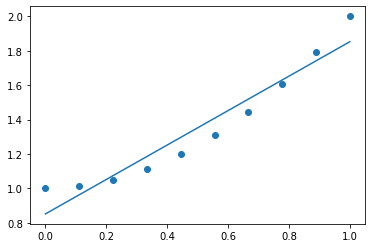

In [13]:
plt.scatter(x,y)
vx, vy = lin_func_plot(a1_list[-1],b1_list[-1],0,1)
print(a1_list[-1],b1_list[-1])

We can observe that gda's behavior is vary comparing to batch gda but requires less computaions for an update while for batch we need to loop throu all data.

### a) GDA - gradient descent algorithm
We come back to our topic. Let's beaging by implementing GDA for more general, to make ito work even on more dimensional data. Than we will see how it behaves on our Iris data.

[1.25952978 1.0036     1.00716256 1.00968807 1.01418731 1.01763977
 1.02364926 1.02679497 1.03111327 1.03438666]
[2.03785233 0.20072    0.20143251 0.20193761 0.20283746 0.20352795
 0.20593175 0.20687546 0.20773912 0.2083938 ]


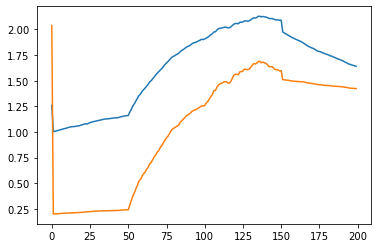

In [14]:
#cost function J:
def J(theta,x_data,y_labels,h_func):
    N = x_data.shape[0]
    s = 0
    for i in range(N):
        s += (h_func(theta,x_data[i]) - y[i])**2
    
    return s/2

# we implement GDA
# inputs should by np.arrays
def gda(data,labels,grad_fn,alpha,iter_grad):
    N = data.shape[0]
    x0 = np.ones(N)
    # 1st we must asure that x's in data
    # are this x = (1,x1,x2,...,xd)
    data = np.column_stack((x0,data))
    N, D = data.shape
    # dimension of theta must be equal to dim. of x
    # initialize theta
    theta = data[0]
    theta_list = [data[0]]
    for t in range(iter_grad):
        for i in range(N):
            # we make an udate each step
            theta -= alpha*grad_fn(data[i],labels[i],theta)
            theta_list.append(theta.copy())
    return np.array(theta_list)

h_reg = lambda x,theta:np.dot(theta,x)
grad_J_reg = lambda x,y,theta:(np.dot(theta,x)-y)*x

x = np.array(iris_df["petal width (cm)"])
y = np.array(iris_df["petal length (cm)"])

theta = gda(x,y,grad_J_reg,0.01,1000)
#print(theta[:10])
print(theta[:10,0])
print(theta[:10,1])
plt.plot(theta[:200,0])
plt.plot(theta[:200,1])
#theta


Again we observe that $\theta$ updates behaves vary, but eventually its begining to converge at some point. This converged $\theta$ gives us a regression line below.

(array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ]),
 array([1.25952978, 1.93881389, 2.618098  , 3.29738211, 3.97666623,
        4.65595034, 5.33523445, 6.01451856, 6.69380267, 7.37308678]))

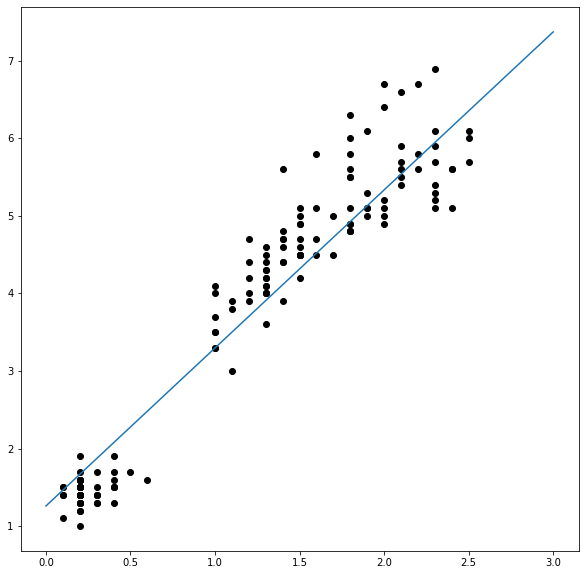

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x,y,color='k')
lin_func_plot(theta[-1,1], theta[-1,0],0,3,ax)

### b) BGD - batch gradient descent
Let's now implement the BGD for more general use.
<br>
If we apply our hypothesis $h_\theta (x) = \theta_0 x_0 + \sum_{i=1}^{d} \theta_i x_i$, where $x_0 = 1$. And if we calculate gradient of $J$  - cost function, than the algorithm is <br>
$\theta \leftarrow$ initialize<br>
do until convarge:<br>
$\theta \leftarrow \theta + \alpha \sum_{i=1}^{n} (y^{(i)} - \theta^T x^{(i)})x^{(i)} = \theta - \alpha \sum_{i=1}^{n} (\theta^T x^{(i)} - y^{(i)})x^{(i)}  $ <br>


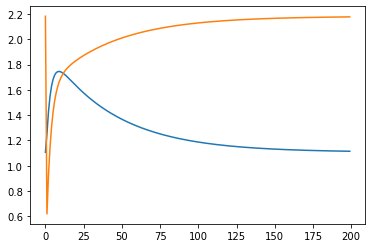

In [16]:
# we implement BGD
# inputs should by np.arrays
def bgd(data,labels,grad_fn,alpha,iter_grad):
    N = data.shape[0]
    x0 = np.ones(N)
    # 1st we must asure that x's in data
    # are this x = (1,x1,x2,...,xd)
    data = np.column_stack((x0,data))
    N, D = data.shape
    # dimension of theta must be equal to dim. of x
    # initialize theta
    theta = data[0]
    theta_list = [data[0]]
    for t in range(iter_grad):
        sum_grads = np.zeros(D)
        for i in range(N):
            # we iterate all data with gd
            sum_grads += grad_fn(data[i],labels[i],theta)
        # actually alpha = alpha*(1/N)
        theta -= alpha*sum_grads/N
        theta_list.append(theta.copy())
    return np.array(theta_list)

h_reg = lambda x,theta:np.dot(theta,x)
grad_J_reg = lambda x,y,theta:(np.dot(theta,x)-y)*x

x = np.array(iris_df["petal width (cm)"])
y = np.array(iris_df["petal length (cm)"])

theta = bgd(x,y,grad_J_reg,0.1,1000)
#print(theta[:10])
#print(theta[:10,0])
#print(theta[:10,1])
plt.plot(theta[:200,0])
plt.plot(theta[:200,1])
#theta

(array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ]),
 array([1.10701663, 1.83466006, 2.56230349, 3.28994692, 4.01759035,
        4.74523378, 5.47287721, 6.20052064, 6.92816407, 7.6558075 ]))

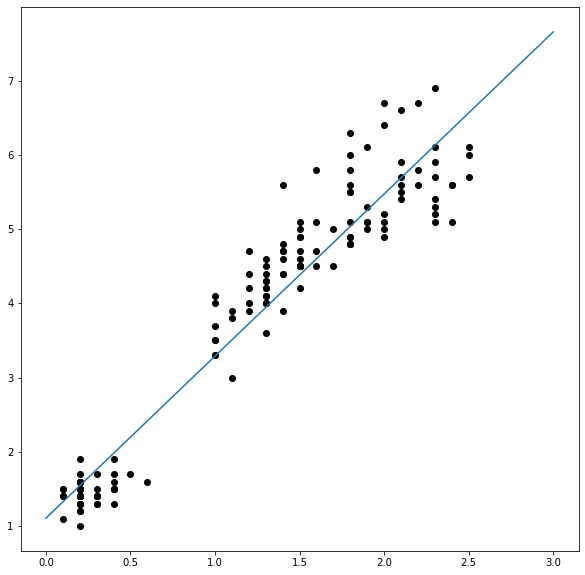

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x,y,color='k')
lin_func_plot(theta[-1,1], theta[-1,0],0,3)

### c) Least means squears and Maximum likelihood

## 2. Classificatoion and Logistic regression
In classification problem we are trying to predict the $y$-labels value based o given data, except this time they are discrete. E.g. $y \in \{-1,1\}$, which may represent the customer that liked the product or didn't.

### a) Logistic regression
Let's asume that our classification is $y \in \{0,1\}$.
This time we would like to choose such a hypothesis function that does not take larger nor lower values than 0 and 1. So our hypothesis is <br> 
<center>$h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$</center>
If we take $z = \theta^T x$, than 
<center>$h_\theta(x) = g(z) = \frac{1}{1 + e^{-z}}$</center>
still $\theta^T x = \theta_0 + \sum_{i=1}^{d} \theta_i x_i$